#### ___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Большой проверочный проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Вы будете применять Ваши навыки работы с pandas и навыки визуализации данных для того, чтобы определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---
---

**Выполните шаги, написанные жирным шрифтом.**

---
----

## Часть 1: Исследуем данные


**ЗАДАНИЕ (ОПЦИОНАЛЬНО): Это задание не является обязательным, но если Вы хорошо знаете английский язык, то прочтите эту статью, по мотивам которой строится наш проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**ЗАДАНИЕ: Прочитайте описание двух .csv-файлов, которые мы будем далее загружать и обрабатывать:**

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

**ЗАДАНИЕ: Импортируйте библиотеки, которые по Вашему мнению могут Вам понадобиться:**

In [2]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

**ЗАДАНИЕ: Выполните ячейку ниже для загрузки файла fandango_scrape.csv**

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head(3)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085


**ЗАДАНИЕ: Изучите свойства полученного объекта DataFrame - выведите несколько первых строк, а также общую информацию.**

In [4]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


**ЗАДАНИЕ: Давайте изучим связь между популярностью фильма и его рейтингом. Нарисуйте график scatterplot, показывающий связь между колонками RATING и VOTES. Можете поменять стилизацию графика по Вашему вкусу.**

504


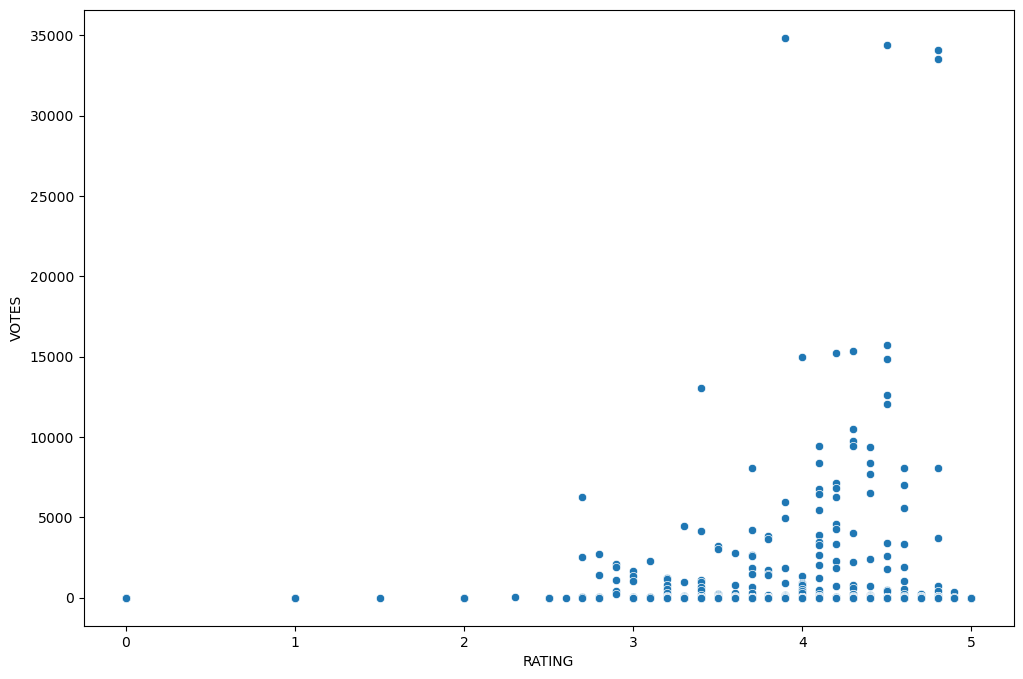

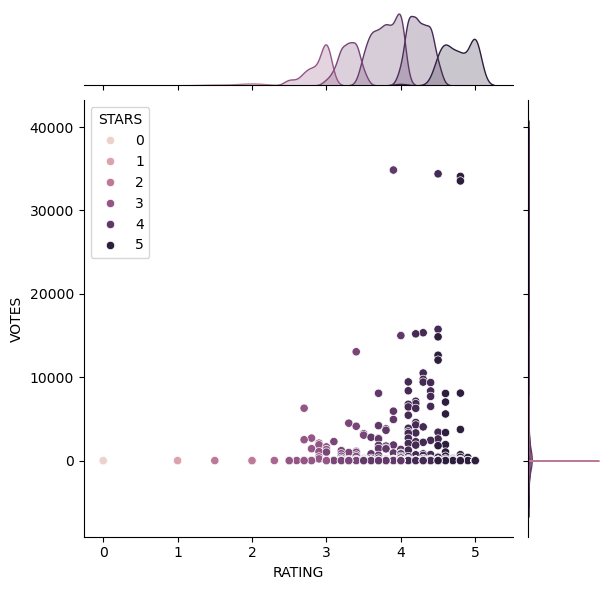

In [7]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize= (12, 8))
print(len(fandango))
sns.scatterplot(data = fandango, y = 'VOTES', x = 'RATING')
sns.jointplot(data = fandango, y = 'VOTES', x = 'RATING', hue = 'STARS')


**ЗАДАНИЕ: Вычислите корреляцию между колонками:**

504


<Axes: >

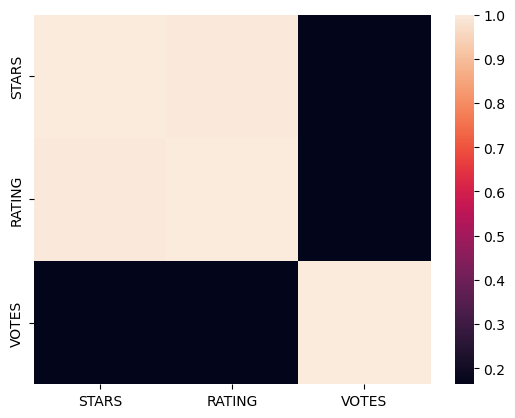

In [8]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
print(len(fandango))
corrs = fandango.corr(numeric_only= True)
corrs.head(4)
sns.heatmap(data= corrs)

**ЗАДАНИЕ: Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создайте новую колонку, в ней возьмите из строки FILM только год, и назовите эту новую колонку YEAR**

In [9]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango['YEAR'] = fandango['FILM'].apply(lambda x: int(x[-5:-1]))
print(len(fandango))
fandango

504


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**ЗАДАНИЕ: Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?**

In [10]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**ЗАДАНИЕ: Визуализируйте количество фильмов в год с помощью графика:**

<Axes: xlabel='YEAR', ylabel='count'>

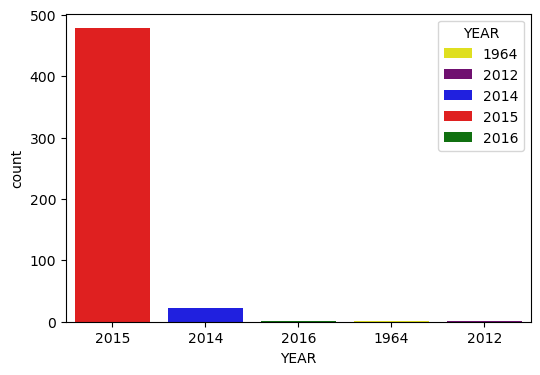

In [11]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize= (6, 4))
sns.countplot(data = fandango, x = 'YEAR', hue = 'YEAR', order = [2015, 2014, 2016, 1964, 2012], 
             palette = {2015: 'red', 2014: 'blue', 2016: 'green', 1964: 'yellow', 2012: 'purple'})


**ЗАДАНИЕ: Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [12]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango.sort_values('VOTES', ascending= False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**ЗАДАНИЕ: Сколько фильмов имеет нулевое количество голосов (votes)?**

In [13]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
len(fandango[fandango['VOTES'] == 0])

69

**ЗАДАНИЕ: Создайте DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалите те фильмы, у которых нет ни одного голоса.**

In [14]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango['VOTES'].value_counts()
fandango_with_votes = fandango[fandango['VOTES'] > 0]
len(fandango_with_votes)
# Удаляем из данных те фильмы, которые не имеют голосов, зачастую, они имеют рейтинг 0, 
#Поэтому такие кино могут помешать нам обнаружить возможное завышение рейтингов.

435

In [15]:
fandango_with_votes.head(3)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

**ЗАДАНИЕ: Создайте график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежьте диапазон KDE в пределах 0-5.**

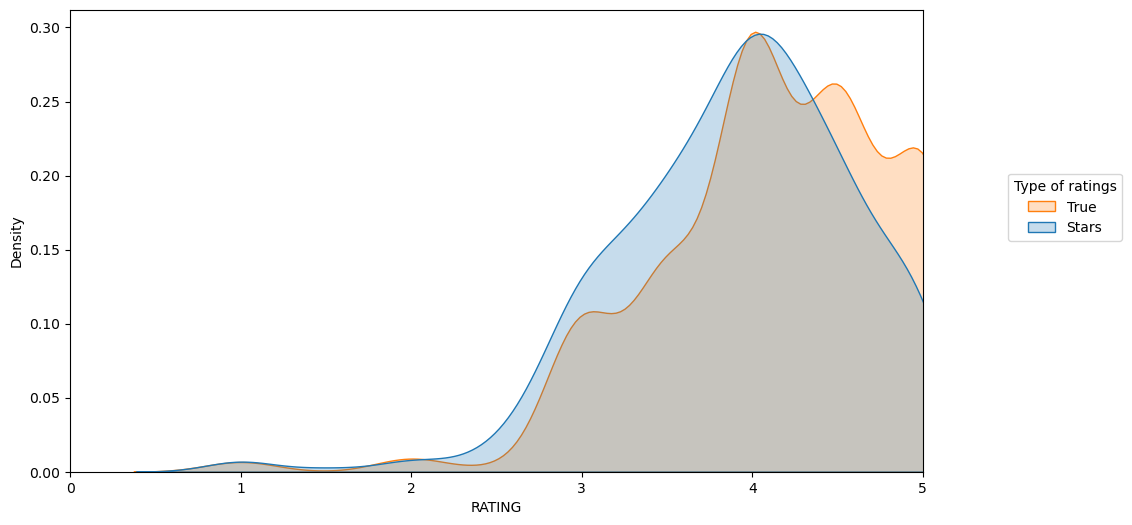

In [16]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize = (11, 6))
raytings = pd.DataFrame({'RATING': fandango_with_votes['RATING'], 
                                   'TYPE': ['True'] * len(fandango_with_votes)})
stars = pd.DataFrame({'RATING': fandango_with_votes['STARS'], 
                                   'TYPE': ['Stars'] * len(fandango_with_votes)})

raytings_and_stars = pd.concat([raytings, stars], axis = 0)
raytings_and_stars.sample(3)

axes = sns.kdeplot(data = raytings_and_stars, x = 'RATING', hue = 'TYPE', fill = True)
axes.set_xlim(0, 5)

axes.legend(labels=['True', 'Stars'], title='Type of ratings', loc = (1.1, 0.5))

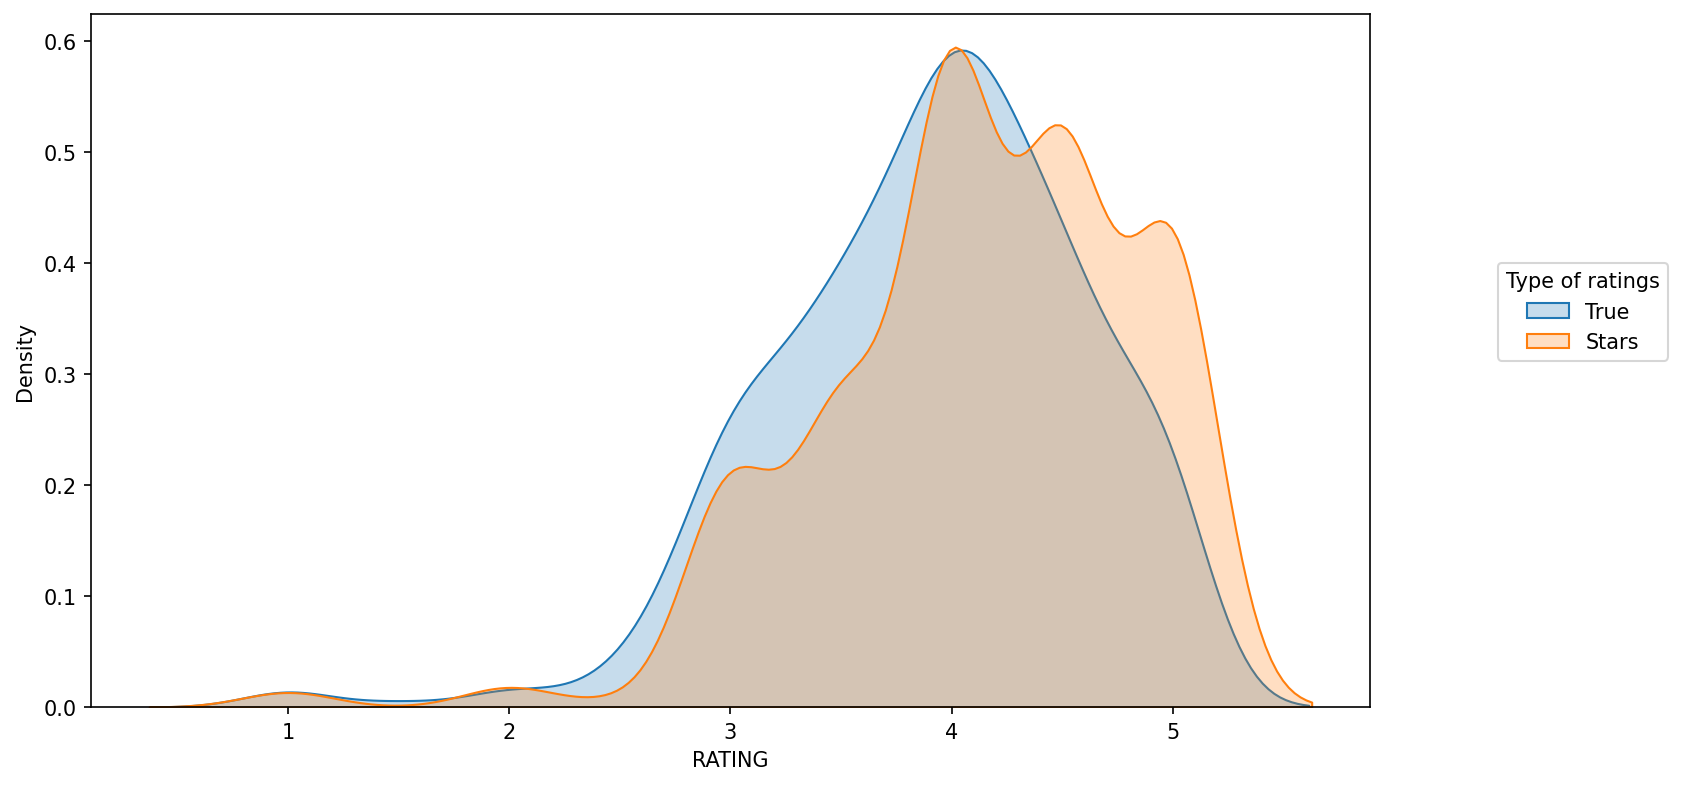

In [17]:
plt.figure(figsize=(11,6),dpi=150)
axes = sns.kdeplot(data=fandango_with_votes, x='RATING',fill=True, label='True')
sns.kdeplot(data=fandango_with_votes, x='STARS', fill=True, label='Stars')

axes.legend(title = 'Type of ratings', loc = (1.1, 0.5))

**ЗАДАНИЕ: Теперь давайте посчитаем эту разницу в численном виде; Создайте новую колонку, в которой сохраните разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполните округление до одной десятичной цифры после запятой.**

In [18]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango_with_votes['DIFF_IN_RATINGS'] = fandango_with_votes['STARS'] - fandango_with_votes['RATING']
fandango_with_votes.head(4)
fandango_with_votes['DIFF_IN_RATINGS'].mean()

/tmp/ipykernel_37866/264312100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_with_votes['DIFF_IN_RATINGS'] = fandango_with_votes['STARS'] - fandango_with_votes['RATING']


np.float64(0.21172413793103448)

In [16]:
fandango_with_votes.head(5)

,FILM,STARS,RATING,VOTES,YEAR,DIFF_IN_RATINGS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**ЗАДАНИЕ: Нарисуйте график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

Text(0.5, 1.0, 'Rating defferences and their count')

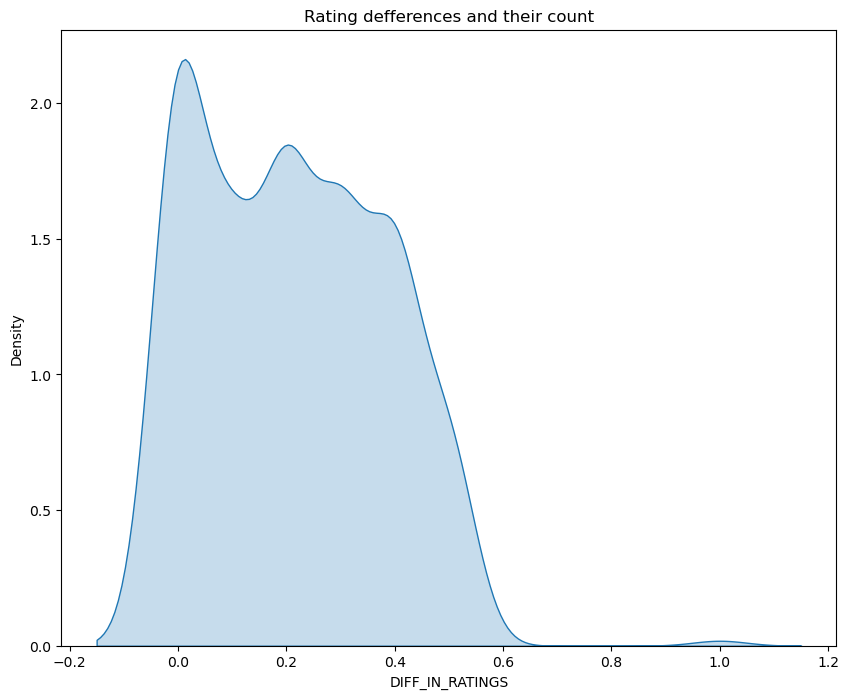

In [17]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(10, 8))
sns.kdeplot(data= fandango_with_votes, x = 'DIFF_IN_RATINGS', fill = True)
plt.title('Rating defferences and their count')

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

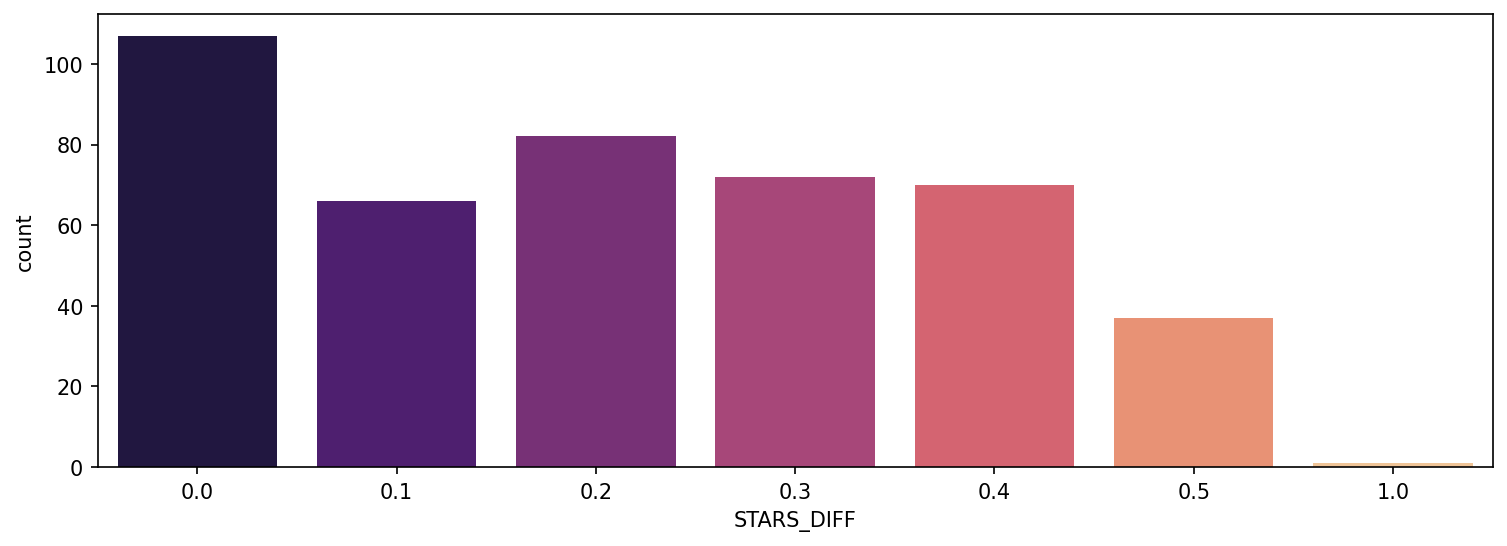

**ЗАДАНИЕ: На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдите этот фильм.**

In [22]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango_with_votes[fandango_with_votes['DIFF_IN_RATINGS'] == 1]['FILM'].values

array(['Turbo Kid (2015)'], dtype=object)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

**ЗАДАНИЕ: Выполните ячейку ниже, чтобы загрузить файл "all_sites_scores.csv"**

In [23]:
all_sites = pd.read_csv("all_sites_scores.csv")

**ЗАДАНИЕ: Изучите общие свойства полученного объекта DataFrame.**

In [24]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [26]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


<Figure size 1000x800 with 0 Axes>

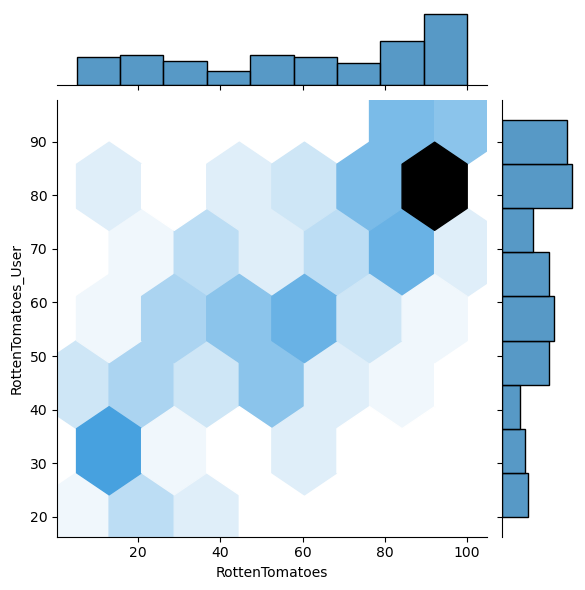

In [27]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(10, 8))
sns.jointplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User', kind = 'hex')

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

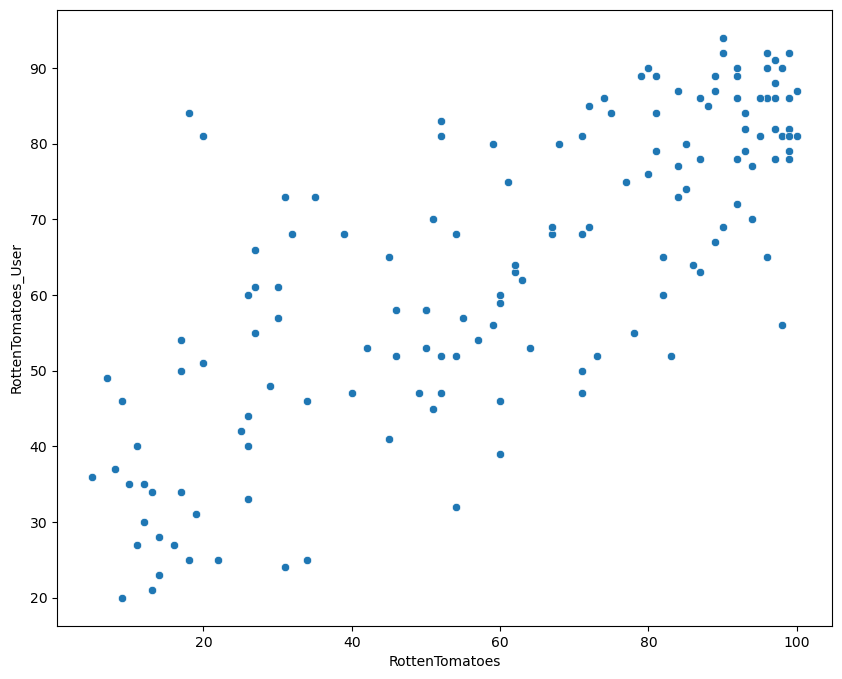

In [28]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')



### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**ЗАДАНИЕ: Нарисуйте график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**ЗАДАНИЕ: Создайте новую колонку, в которой сохраните разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используйте формулу RottenTomatoes-RottenTomatoes_User.**

In [29]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
rotten_tomatoes = all_sites[all_sites.columns[:3]]
rotten_tomatoes['Diff_in_ratings'] = rotten_tomatoes['RottenTomatoes'] - rotten_tomatoes['RottenTomatoes_User'] 
rotten_tomatoes.head()

/tmp/ipykernel_37866/1719686398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes['Diff_in_ratings'] = rotten_tomatoes['RottenTomatoes'] - rotten_tomatoes['RottenTomatoes_User']


,FILM,RottenTomatoes,RottenTomatoes_User,Diff_in_ratings
0,Avengers: Age of Ultron (2015),74,86,-12
1,Cinderella (2015),85,80,5
2,Ant-Man (2015),80,90,-10
3,Do You Believe? (2015),18,84,-66
4,Hot Tub Time Machine 2 (2015),14,28,-14


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**ЗАДАНИЕ: Вычислите среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [30]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
np.abs(rotten_tomatoes['Diff_in_ratings']).mean()
np.vectorize(abs)(rotten_tomatoes['Diff_in_ratings']).mean()

np.float64(15.095890410958905)

Text(0.5, 1.0, 'User and Critics Ratings in Rotten')

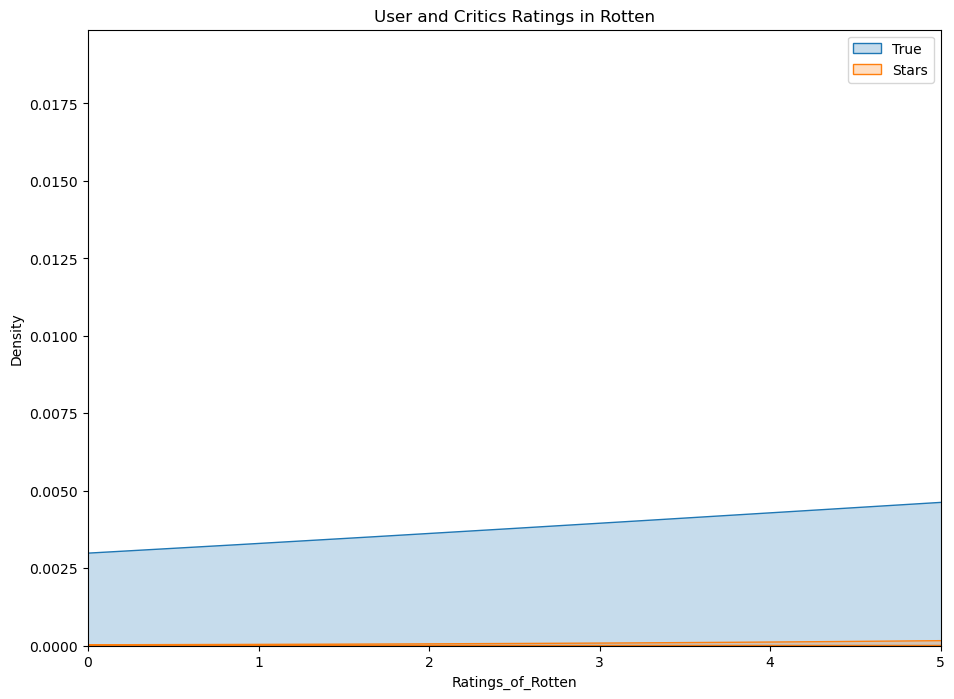

In [31]:
# построим снова kde для разных рейтингов, чтобы анализировать уровень предвзятости рейтингов, отображемых на сайте
fig = plt.figure(figsize=(11, 8))
axes = sns.kdeplot(data = rotten_tomatoes, x = 'RottenTomatoes', label = 'True', fill =True)
sns.kdeplot(data = rotten_tomatoes, x = 'RottenTomatoes_User', label = 'Stars', fill =True)
axes.set_xlim(0, 5)
axes.set_xlabel('Ratings_of_Rotten')
plt.legend()
plt.title('User and Critics Ratings in Rotten')
# Здесь мы видим, что большинство фильмов с высокой оценкой относятся к мнению критиков, а не пользователей, поэтому на этом кином=сайте точно не ожидается завышения рейтингов фильмов

**ЗАДАНИЕ: Нарисуйте график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения можете использовать как KDE, так и гистограммы.**

<Axes: xlabel='Diff_in_ratings', ylabel='Count'>

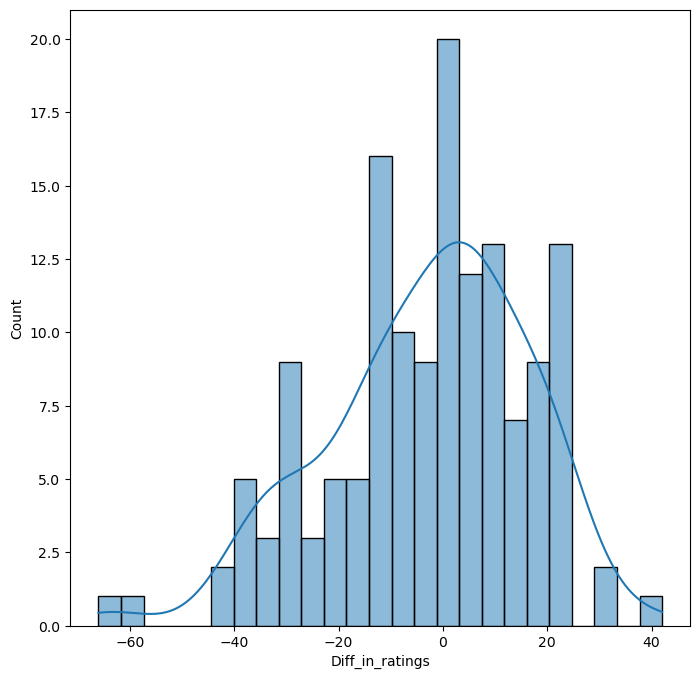

In [32]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(8, 8))
sns.histplot(data = rotten_tomatoes, x = 'Diff_in_ratings', kde = True, bins= 25)


**ЗАДАНИЕ: Далее нарисуйте график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

<Axes: xlabel='Diff_in_ratings', ylabel='Count'>

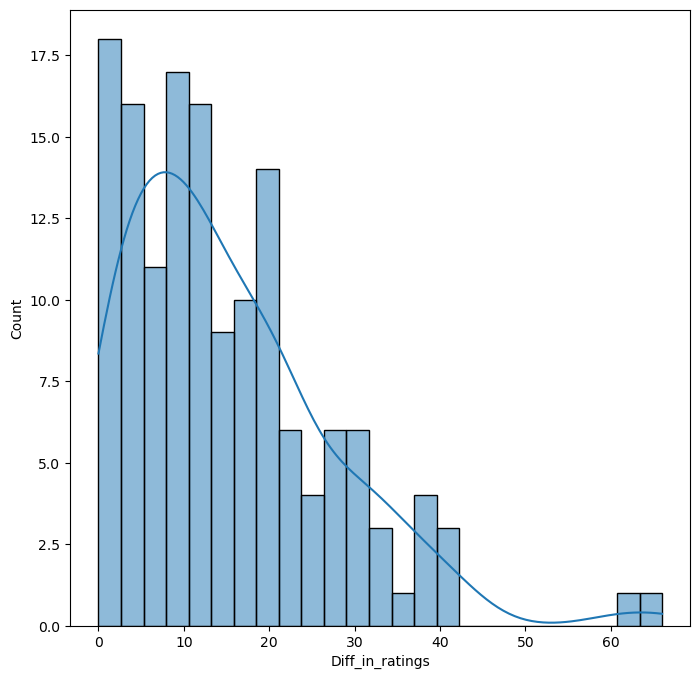

In [38]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(8, 8))
sns.histplot(data = pd.DataFrame(rotten_tomatoes['Diff_in_ratings'].apply(lambda x: abs(x)) ), x = 'Diff_in_ratings', kde = True, bins= 25)

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**ЗАДАНИЕ: Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [39]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
rotten_tomatoes.sort_values('Diff_in_ratings')[['FILM', 'Diff_in_ratings']].head(5)

,FILM,Diff_in_ratings
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**ЗАДАНИЕ: Далее наоборот - отобразите 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [40]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
rotten_tomatoes.sort_values('Diff_in_ratings', ascending= False)[['FILM', 'Diff_in_ratings']].head(5)

,FILM,Diff_in_ratings
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**ЗАДАНИЕ: Нарисуйте график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

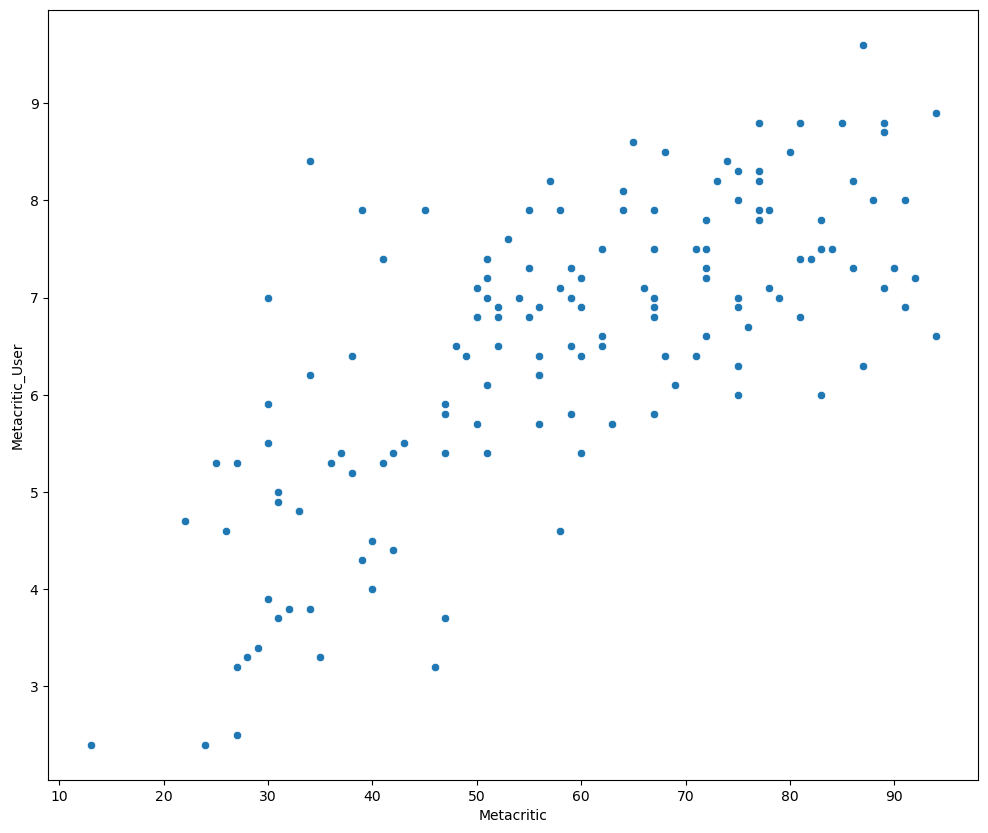

In [41]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

In [43]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**ЗАДАНИЕ: Нарисуйте график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

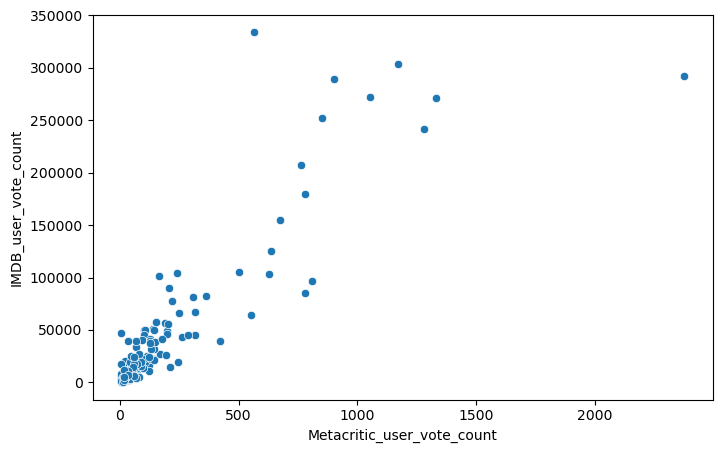

In [44]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

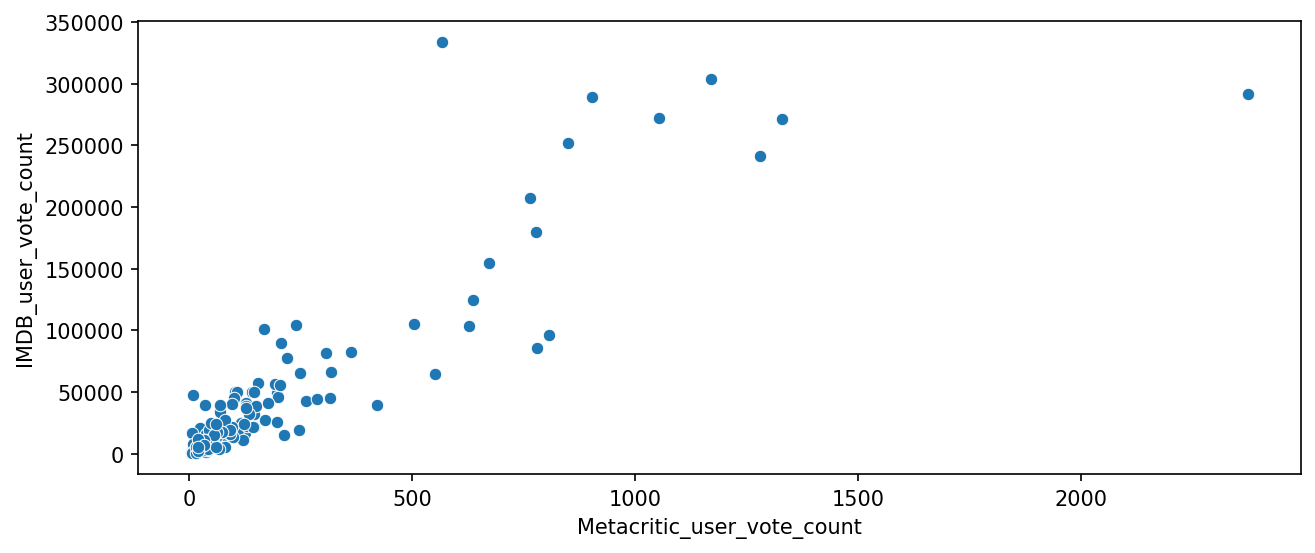

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

**ЗАДАНИЕ: Какой фильм получил наибольшее количество голосов на IMDB?**

In [45]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
all_sites.sort_values('IMDB_user_vote_count', ascending= False).iloc[0]


FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Name: 14, dtype: object

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**ЗАДАНИЕ: Какой фильм получил наибольшее количество голосов на Metacritic?**

In [46]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
all_sites.sort_values('Metacritic_user_vote_count', ascending= False).iloc[0]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Name: 88, dtype: object

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**ЗАДАНИЕ: Объедините таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделайте объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [47]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
sites = fandango.merge(all_sites, on= 'FILM', how = 'inner')
print(f'количество фильмов fandango: {len(fandango)}, количество фильмов после объединения с другими киносайтами: {len(sites)}')
sites.head(5)

количество фильмов fandango: 504, количество фильмов после объединения с другими киносайтами: 145


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**ЗАДАНИЕ: Добавьте дополнительные колонки в all_sites, и запишите в них нормализованные значения рейтингов от 0 до 5. Это можно сделать разными способами.**

В качестве подсказки, можете прочитать вот эту статью: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Ещё одна подсказка - простой способ конвертации рейтингов:
* 100/20 = 5 
* 10/2 = 5

In [48]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
columns = sites.columns
# рейтинговые ненормализованные столбцы, их индексы (5 .. 9)
len_with_zero = len(sites[sum([sites[col] == 0 for col in columns[5:10]]) > 0]) # = 0 (нет нулевых рейтингов, можно minmax нормировку)
print(f"{len_with_zero} нет нулевых рейтингов среди данных")

sites_norm = sites.copy()
for col in columns[5:10]:
    minEl, maxEl = sites[col].min(), sites[col].max()
    print(minEl, maxEl)
    sites_norm[col] = sites[col].apply(lambda x: round(5 * (x - minEl) / (maxEl - minEl), 1) )
    print(f'{sites_norm[col].min()} - нормировка работает правильно')
sites_norm['RottenTomatoes'].unique()
sites_norm

0 нет нулевых рейтингов среди данных
5 100
0.0 - нормировка работает правильно
20 94
0.0 - нормировка работает правильно
13 94
0.0 - нормировка работает правильно
2.4 9.6
0.0 - нормировка работает правильно
4.0 8.6
0.0 - нормировка работает правильно


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,1.1,1.5,2.0,0.6,0.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,2015,3.5,4.1,2.8,3.2,3.6,1281,241807
2,American Sniper (2015),5.0,4.8,34085,2015,3.5,4.4,3.6,2.9,3.7,850,251856
3,Furious 7 (2015),5.0,4.8,33538,2015,4.0,4.3,3.3,3.1,3.7,764,207211
4,Inside Out (2015),4.5,4.5,15749,2015,4.9,4.7,5.0,4.5,5.0,807,96252
...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,4.3,2.9,3.4,2.8,2.9,19,5289
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,4.7,4.1,4.6,2.7,3.3,18,1107
142,The Wrecking Crew (2015),4.5,4.2,38,2015,4.6,4.3,3.3,3.2,4.1,4,732
143,Tangerine (2015),4.0,3.9,36,2015,4.7,4.5,4.5,3.4,3.7,14,696


In [66]:
sites.sort_values('RottenTomatoes').index[:10]
sites_norm.sort_values('RottenTomatoes').index[:10]
print(sites.loc[[78, 109]], sites_norm.loc[[78, 109]])

                         FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
78           Mortdecai (2015)    3.5     3.2   1196  2015              12   
109  The Vatican Tapes (2015)    3.0     2.9    210  2015              13   

     RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
78                    30          27              3.2   5.5   
109                   21          37              5.4   4.6   

     Metacritic_user_vote_count  IMDB_user_vote_count  
78                          144                 31878  
109                           5                   952                            FILM  STARS  RATING  RottenTomatoes  \
78           Mortdecai (2015)    3.5     3.2             0.4   
109  The Vatican Tapes (2015)    3.0     2.9             0.4   

     RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  
78                   0.7         0.9              0.6   1.6  
109                  0.1         1.5              2.1   0.7  


In [49]:
sites_norm = sites_norm[list(columns[:3]) + list(columns[5:10])]
sites_norm.head(5)

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.1,1.5,2.0,0.6,0.2
1,Jurassic World (2015),4.5,4.5,3.5,4.1,2.8,3.2,3.6
2,American Sniper (2015),5.0,4.8,3.5,4.4,3.6,2.9,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.3,3.3,3.1,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.7,5.0,4.5,5.0


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**ЗАДАНИЕ: Далее создайте DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставьте колонки STARS и RATING из исходной таблицы fandango.**

In [239]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**ЗАДАНИЕ: Нарисуйте график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуйте использовать Seaborn KDEplot (посмотрите документацию). Не беспокойтесь, если Ваш график будет выглядеть немного иначе нашего примера. Главное, чтобы были видны отличия между отдельными распределениями.**

p.s. если Вам нужно переместить легенду на графике seaborn kdeplot, то это можно сделать вот так: https://github.com/mwaskom/seaborn/issues/2280

/tmp/ipykernel_37866/4119716722.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  axes = sns.kdeplot(data = sites_norm, x = 'STARS', label = 'Stars', fill = True, shade = True)
/tmp/ipykernel_37866/4119716722.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = sites_norm, x = 'RATING', label = 'Rating', fill = True, shade = True)
/tmp/ipykernel_37866/4119716722.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = sites_norm, x = 'RottenTomatoes', label = 'RT', fill = True, shade = True)
/tmp/ipykernel_37866/4119716722.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will b

(0.0, 5.0)

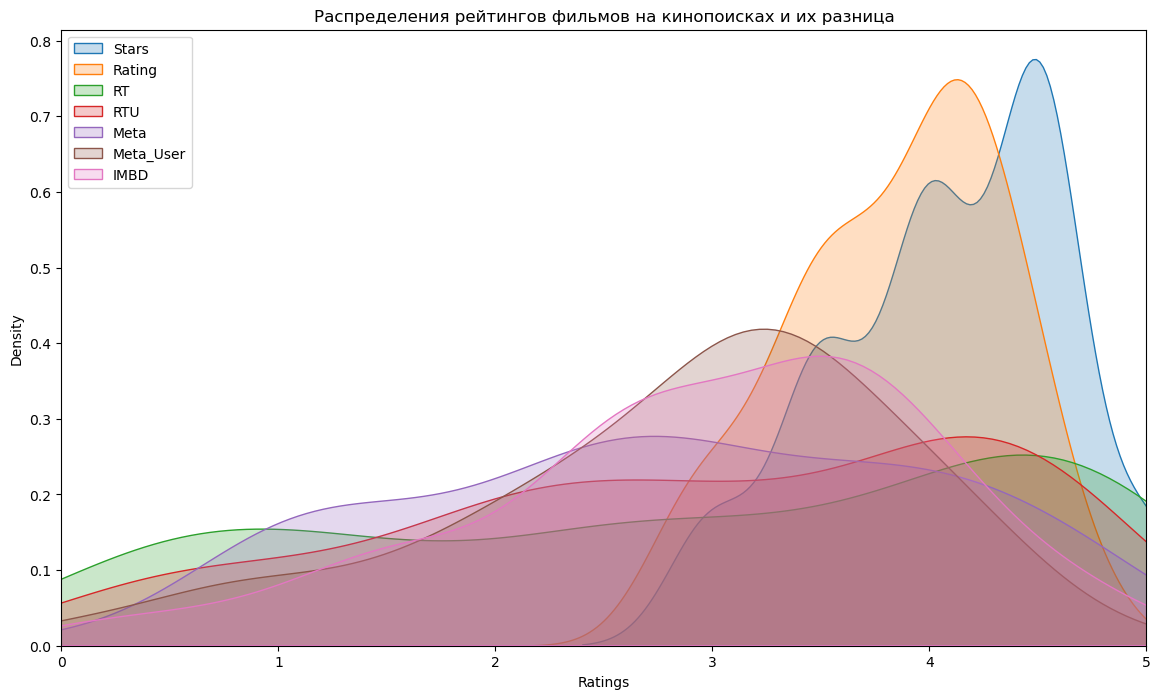

In [78]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(14, 8))
axes = sns.kdeplot(data = sites_norm, x = 'STARS', label = 'Stars', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'RATING', label = 'Rating', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'RottenTomatoes', label = 'RT', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'RottenTomatoes_User', label = 'RTU', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'Metacritic', label = 'Meta', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'Metacritic_User', label = 'Meta_User', fill = True, shade = True)
sns.kdeplot(data = sites_norm, x = 'IMDB', label = 'IMBD', fill =True, shade = True)

plt.title('Распределения рейтингов фильмов на кинопоисках и их разница')
plt.legend()
plt.xlabel('Ratings')
axes.set_xlim(0, 5)
# Мы видим, что график для Stars(рейтиннги пользователей fandango) достаточно заметно смещён вправо относительно других графиков,
# то есть соответственно и количество фильмов с высокими оценками будет намного больше, чем в остальных кинопоисках, 
# что подтверждает предвзятость рейтингов на fandango

# К тому же подобное поведение можно заметить с графиком для реальных рейтингов fandango, но только это относится к фильмам с рейтингами около 4.5 конкретно, 
#судя по графику согласно высокой плотности распределения на этом участке рейтингов относительно других кинопоисков

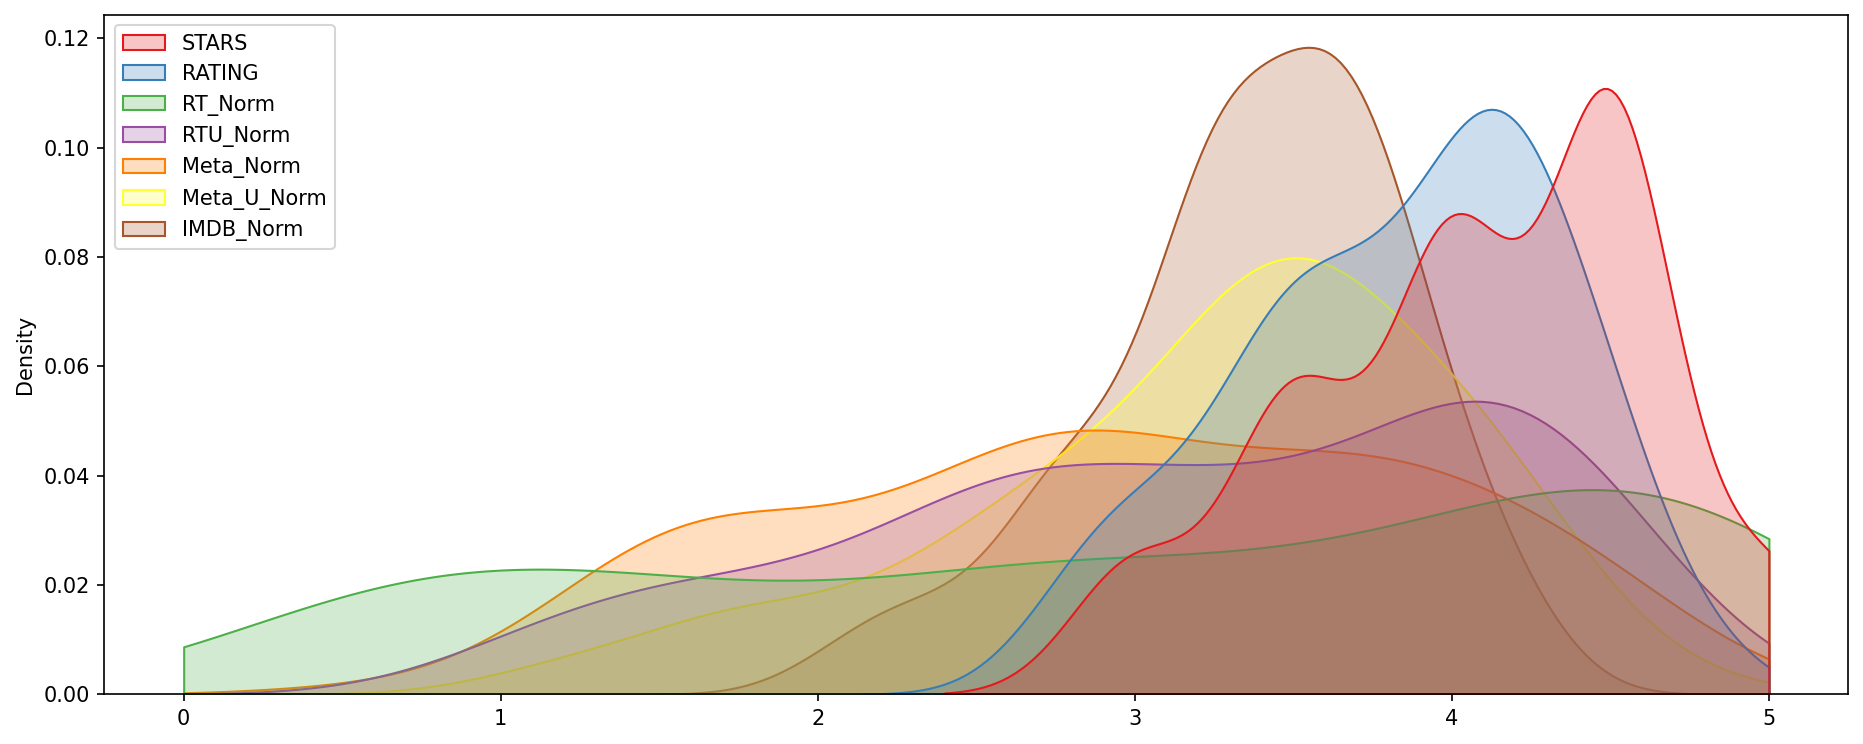

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**ЗАДАНИЕ: Нарисуйте график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

(0.0, 5.0)

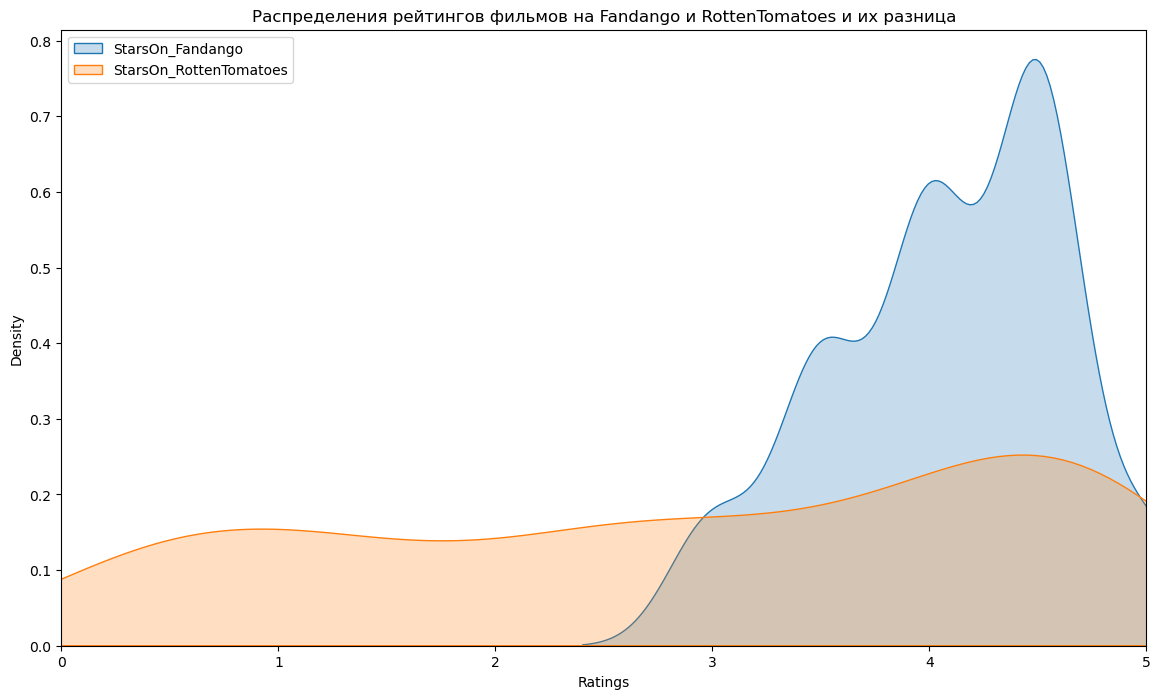

In [109]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(14, 8))
axes = sns.kdeplot(data = sites_norm, x = 'STARS', label = 'StarsOn_Fandango', fill = True)
sns.kdeplot(data = sites_norm, x = 'RottenTomatoes', label = 'StarsOn_RottenTomatoes', fill = True)

plt.title('Распределения рейтингов фильмов на Fandango и RottenTomatoes и их разница')
plt.legend()
plt.xlabel('Ratings')
axes.set_xlim(0, 5)

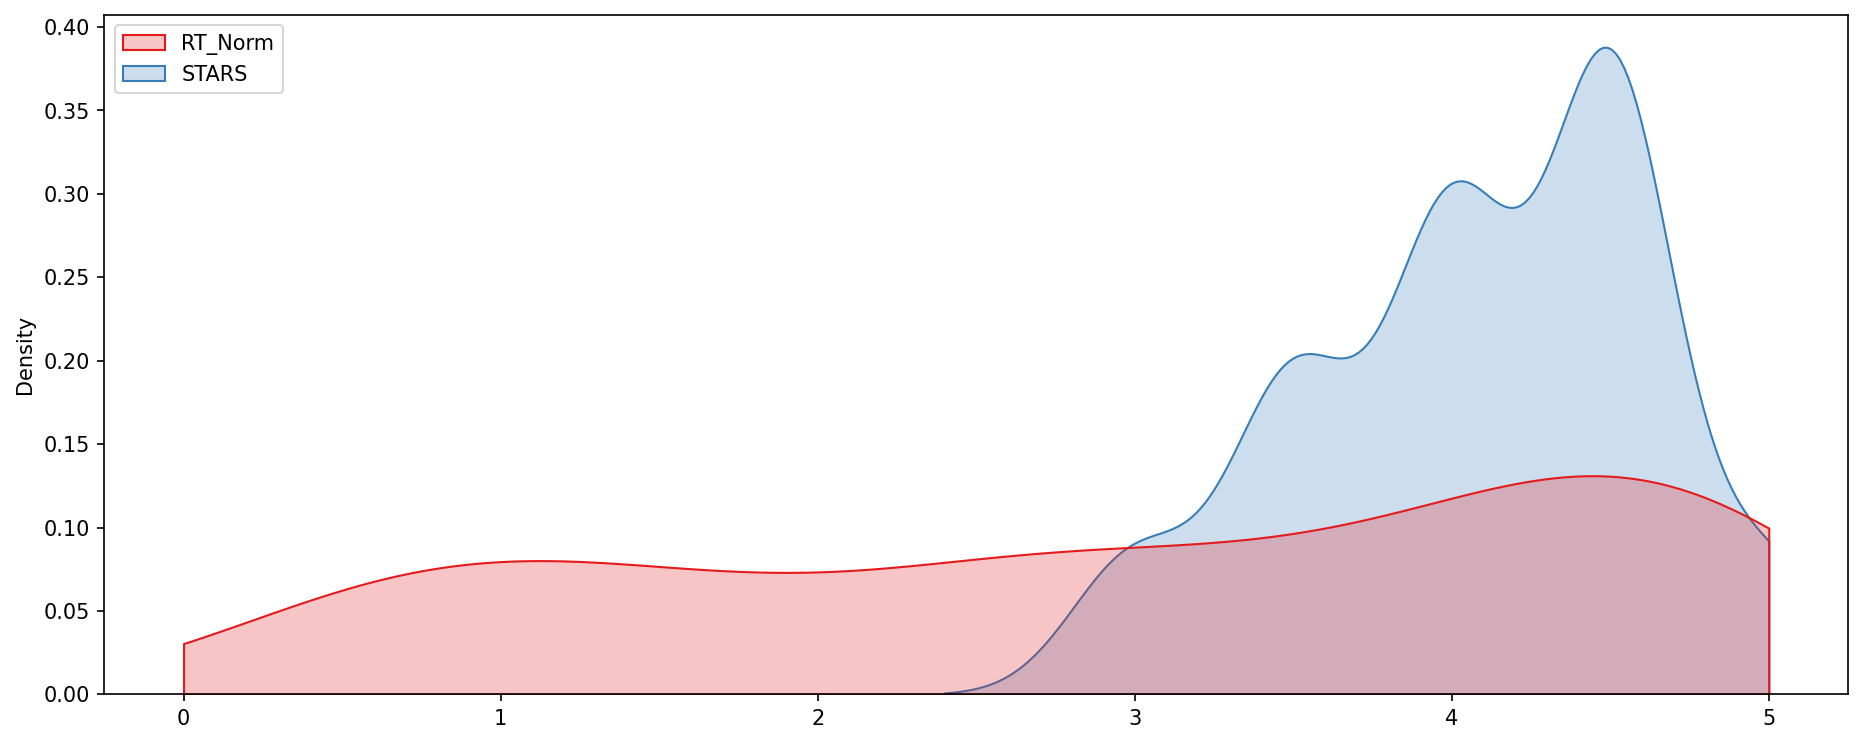

# Вычислим среднее значения разницы в рейтингах кинопоисков Fandango и RotterTomatoes. а также разницу между их матожиданиями для более точной статистики

In [68]:
print(f' {(sites_norm['STARS'] - sites_norm['RottenTomatoes']).mean()} - средняя разница между значениями fandango и RT_critics')
print(f'{sites_norm['STARS'].mean() - sites_norm['RottenTomatoes'].mean()} - разница между срежними значениями fandango и RT_critics')
print(f'{sites_norm['STARS'].min() - sites_norm['RottenTomatoes'].min()} - разница между минимальными значениями fandango и RT_critics')
# Огромна разница между минимальными значеними - можно сделать вывод, что минимальным рейтинг fandango сильно сдвинут вправо 
# (стремится к 5) относительно минимальны значений других сайтов

 1.1579310344827587 - средняя разница между значениями fandango и RT_critics
1.1579310344827585 - разница между срежними значениями fandango и RT_critics
3.0 - разница между минимальными значениями fandango и RT_critics


**ОПЦИОНАЛЬНОЕ ЗАДАНИЕ: Нарисуйте график histplot, сравнивающий все нормализованные рейтинги.**

(0.0, 5.0)

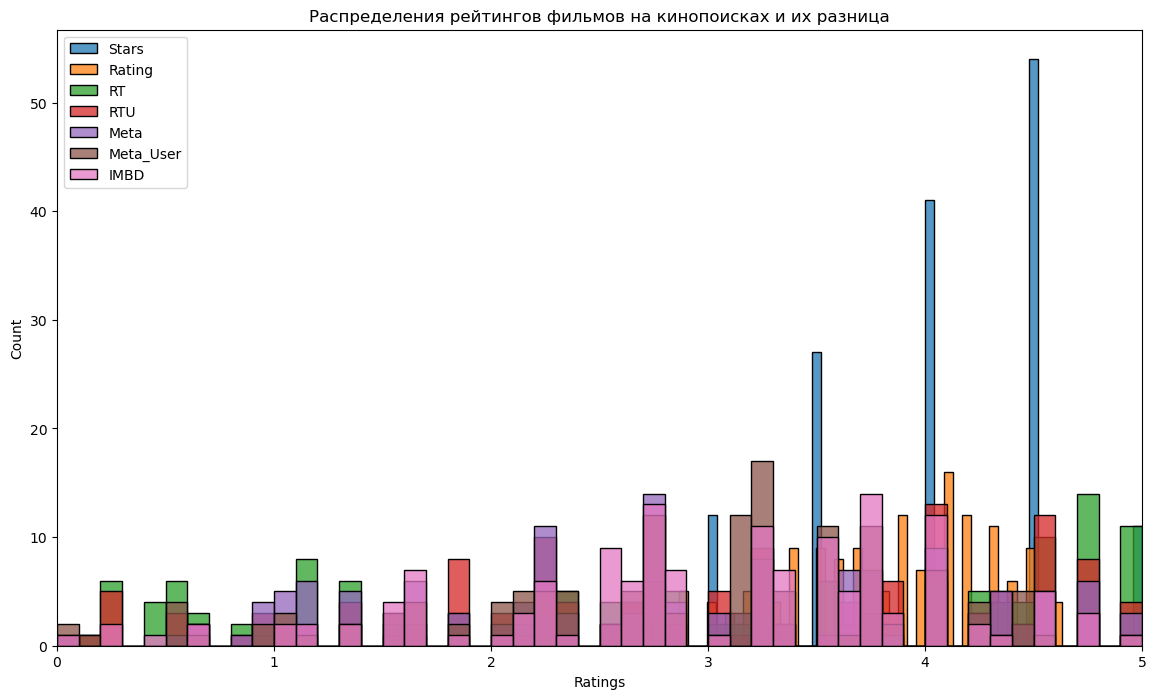

In [114]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(14, 8))
axes = sns.histplot(data = sites_norm, x = 'STARS', label = 'Stars', bins= 50)
sns.histplot(data = sites_norm, x = 'RATING', label = 'Rating', bins= 50)
sns.histplot(data = sites_norm, x = 'RottenTomatoes', label = 'RT', bins= 50)
sns.histplot(data = sites_norm, x = 'RottenTomatoes_User', label = 'RTU', bins= 50)
sns.histplot(data = sites_norm, x = 'Metacritic', label = 'Meta', bins= 50)
sns.histplot(data = sites_norm, x = 'Metacritic_User', label = 'Meta_User', bins= 50)
sns.histplot(data = sites_norm, x = 'IMDB', label = 'IMBD', bins= 50)

plt.title('Распределения рейтингов фильмов на кинопоисках и их разница')
plt.legend()
plt.xlabel('Ratings')
axes.set_xlim(0, 5)

<AxesSubplot:ylabel='Count'>

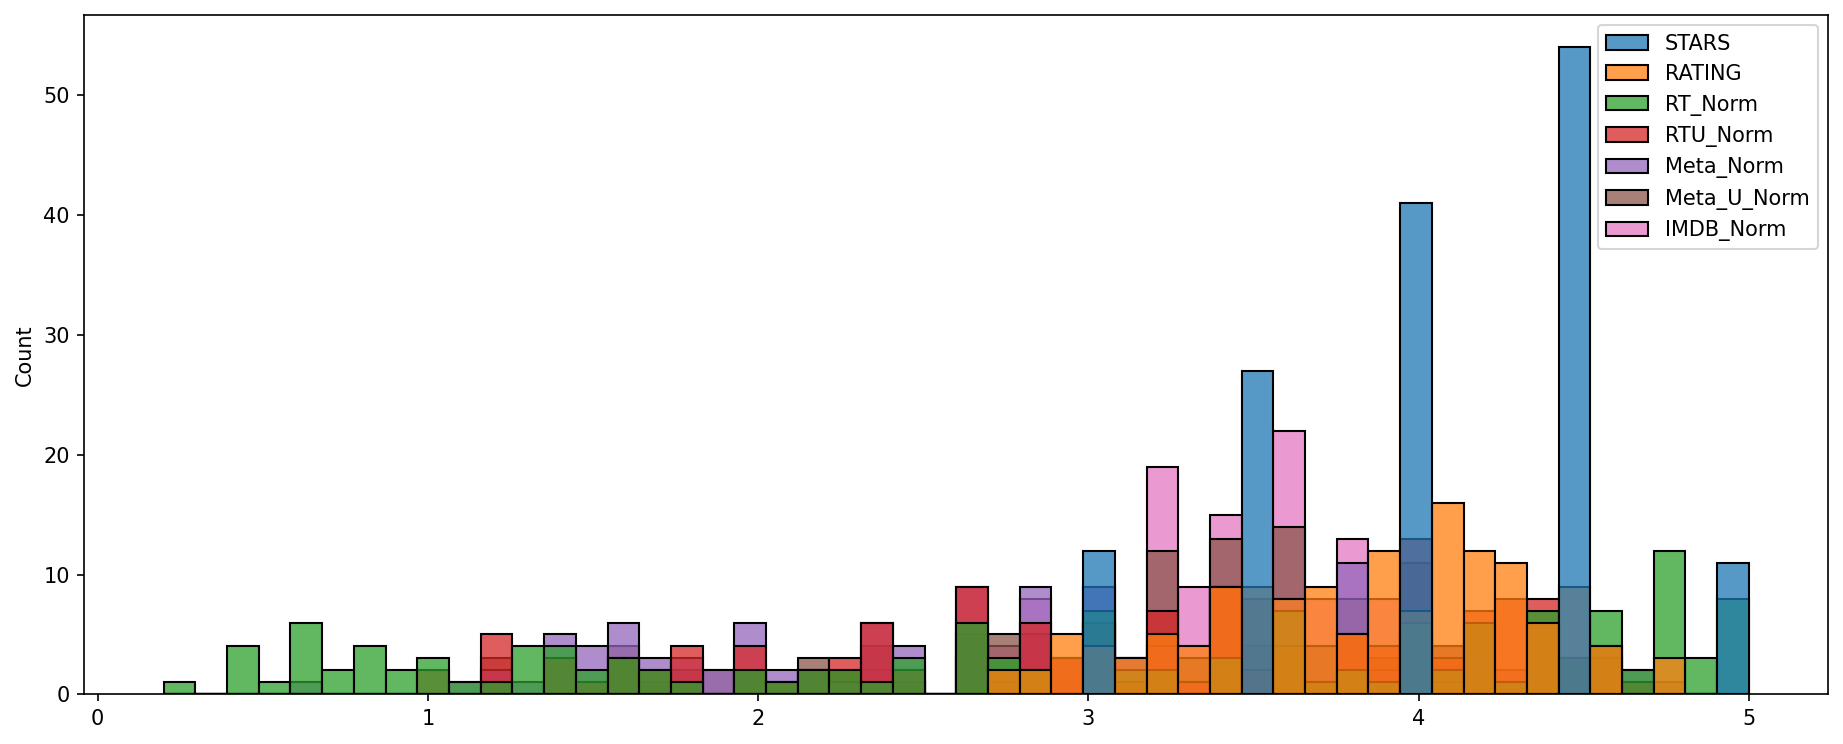


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**ЗАДАНИЕ: Нарисуйте график clustermap для всех нормализованных рейтингов. Обратите внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры. Замечание: для этого графика clustermap вовсе необязательно указывать колонку FILM в качестве индекса, так что при желании можете удалить эту колонку перед построением графика clustermap.**

<Figure size 1000x800 with 0 Axes>

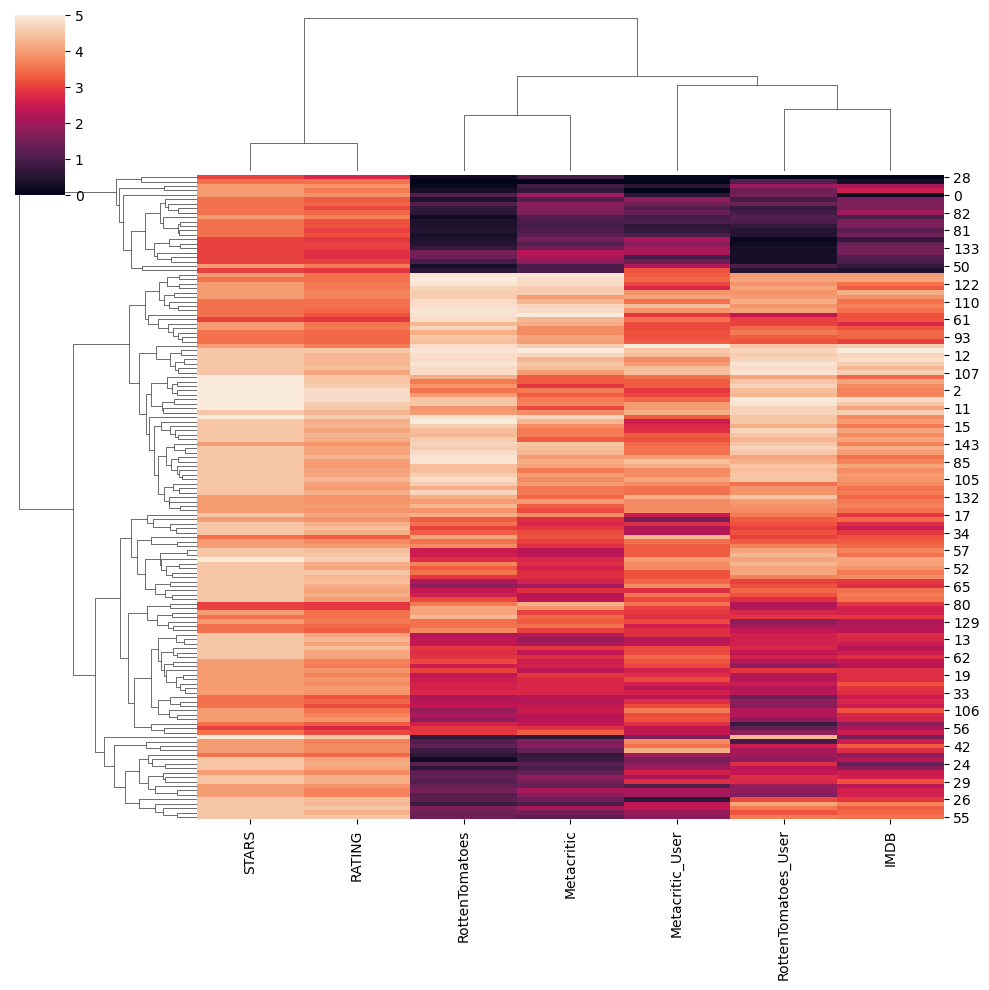

In [115]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(10, 8))
sns.clustermap(data = sites_norm.drop('FILM', axis = 1))
# Заметим, что 

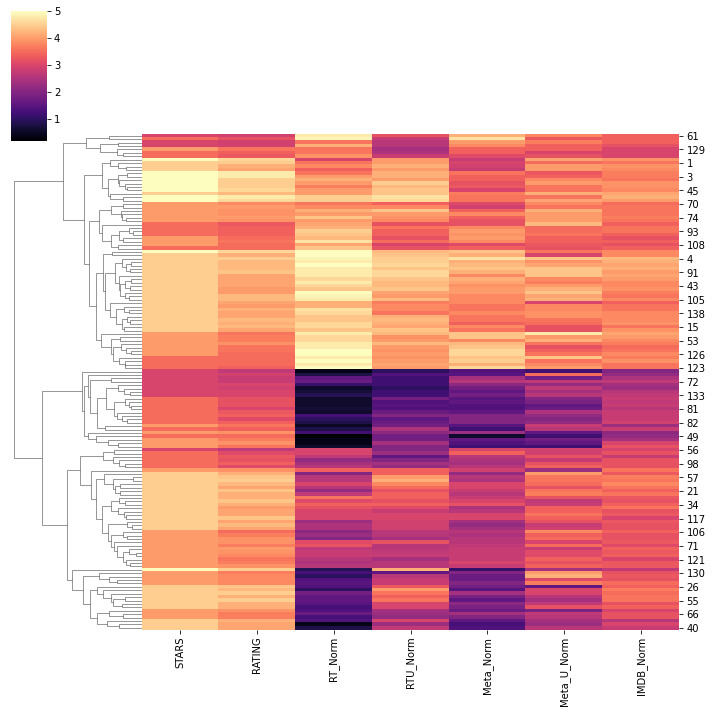

**ЗАДАНИЕ: Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании? Возможно Вам понадобится колонка FILM, так что если вы удаляли её, то верните эту колонку обратно.**

In [72]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
ten_lowest_rt = sites_norm.sort_values('RottenTomatoes').head(10)
ten_lowest_rt
# Огромна разница между минимальными значеними - можно сделать вывод, что фильмы с худшими рейтингами на других кинопоисках для fandango сильно сдвинут вправо 
# (стремится к 5) на  - в этих случая, как видно, завышение идёт (примерно 60%), 
# Например в "The Loft" рейтинг на RT = 0.3, а на Fandango = 4.0

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.0,1.1,0.0,0.0,0.3
84,Hitman: Agent 47 (2015),4.0,3.9,0.1,2.0,0.9,0.6,2.1
54,Hot Pursuit (2015),4.0,3.7,0.2,1.1,1.1,0.9,1.0
25,Taken 3 (2015),4.5,4.1,0.2,1.8,0.8,1.5,2.3
28,Fantastic Four (2015),3.0,2.7,0.2,0.0,0.9,0.1,0.0
50,The Boy Next Door (2015),4.0,3.6,0.3,1.0,1.0,2.2,0.7
87,Unfinished Business (2015),3.5,3.2,0.3,0.5,1.2,1.0,1.5
88,The Loft (2015),4.0,3.6,0.3,1.4,0.7,0.0,2.5
77,Seventh Son (2015),3.5,3.2,0.4,1.0,1.0,1.0,1.6
109,The Vatican Tapes (2015),3.0,2.9,0.4,0.1,1.5,2.1,0.7


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**ФИНАЛЬНОЕ ЗАДАНИЕ: визуализируйте распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

<Axes: xlabel='RottenTomatoes', ylabel='STARS'>

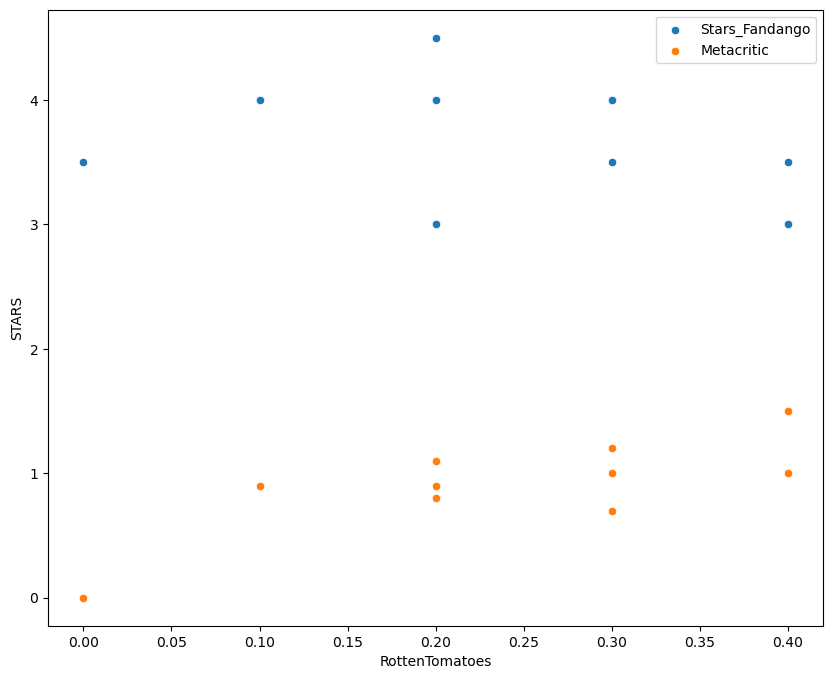

In [73]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fig = plt.figure(figsize=(10, 8))
axes = sns.scatterplot(data = ten_lowest_rt, x = 'RottenTomatoes', y = 'STARS', label = 'Stars_Fandango')
sns.scatterplot(data = ten_lowest_rt, x = 'RottenTomatoes', y = 'Metacritic', label = 'Metacritic')

/tmp/ipykernel_37866/3803249558.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = ten_lowest_rt, fill = True, clip = (0, 5), shade = True)


<Axes: ylabel='Density'>

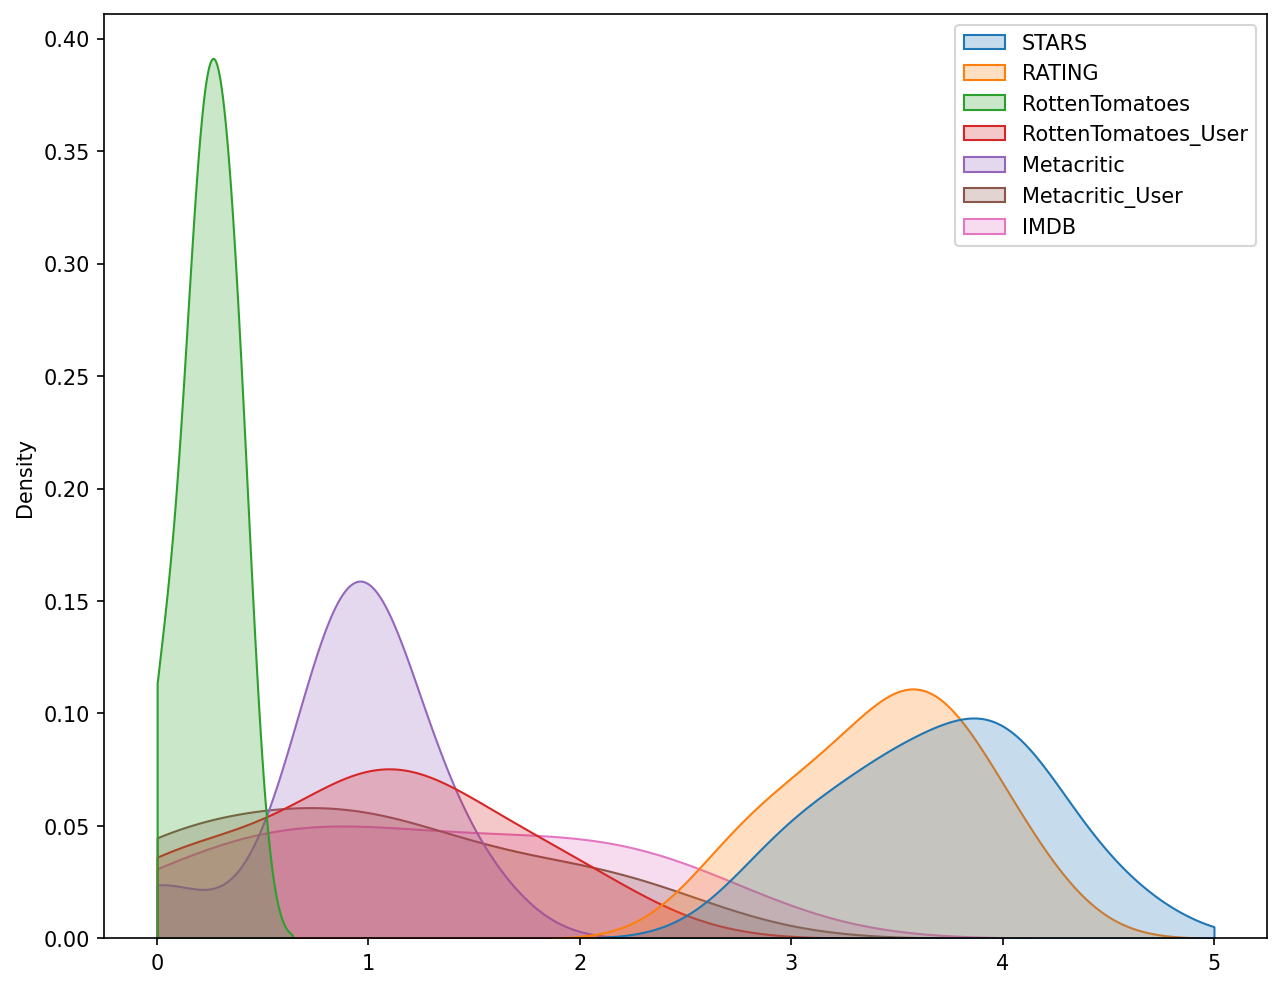

In [77]:
fig = plt.figure(figsize=(10, 8), dpi = 150)
sns.kdeplot(data = ten_lowest_rt, fill = True, clip = (0, 5), shade = True)

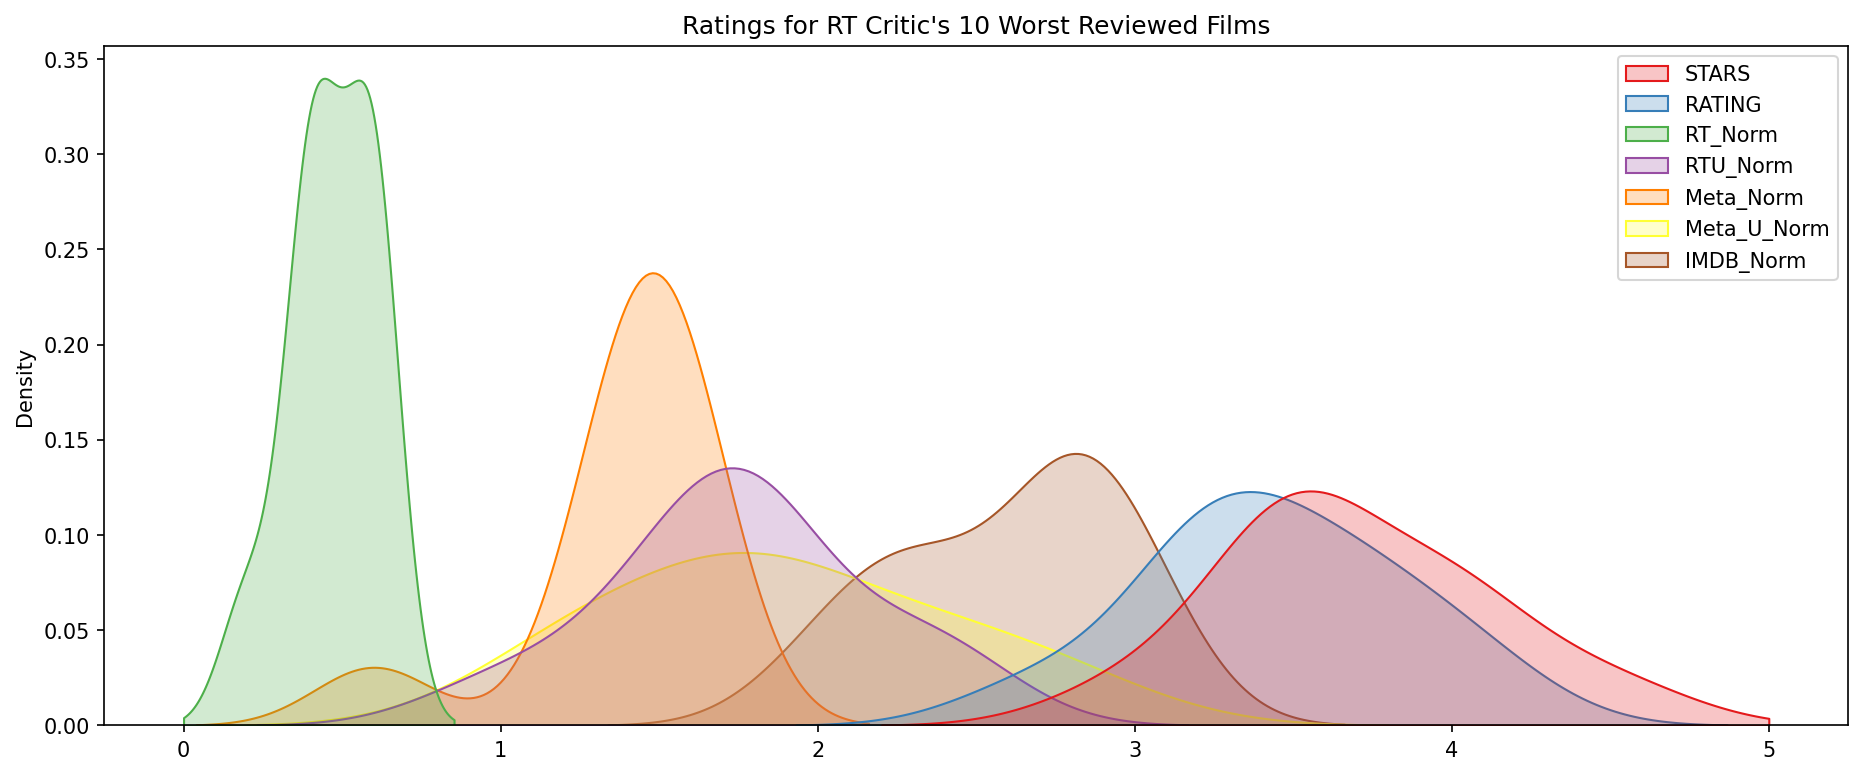

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [79]:
sites_norm.iloc[25]

FILM                   Taken 3 (2015)
STARS                             4.5
RATING                            4.1
RottenTomatoes                    0.2
RottenTomatoes_User               1.8
Metacritic                        0.8
Metacritic_User                   1.5
IMDB                              2.3
Name: 25, dtype: object

In [82]:
round(sites_norm.drop(['FILM', 'STARS', 'RATING'], axis = 1).iloc[25].mean(axis = 0), 1)

np.float64(1.3)

In [254]:
0.4+2.3+1.3+2.3+3

9.3

In [255]:
9.3/5

1.86

----